<a href="https://colab.research.google.com/github/saldanha-deepak/CNN-detect-glasses/blob/main/Project_on_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction - Classification of Customers who wear glasses from those that dont. 

### Model to help guide the 3D cinema business distinguish customers that wear glasses. 



![clip-on glasses](https://www.dhresource.com/0x0/f2/albu/g3/M00/EF/73/rBVaHFoeZ3eAHB8xAAku1oEIc3k323.jpg/clip-on-3d-glasses-anaglyph-lens-for-watching.jpg)

Films play an important role in our daily life with no doubt and they even can make our lives better (Vu, 2022). The film industry has also continued to develop with a large number of viewing demands. 3D films gradually hit their massive popularity in today's marketplace since Avatar kicked off the 3D craze in 2010 (Neal, 2016). These days, a major draw for theater audiences in 3D films. The technology of today's 3D films is impressive, but it still has to depend on 3D glasses transmitting a true 3D experience (Schedeen, 2016).

Many people who wear glasses would be very annoyed every time they go to the theater watching a 3D movie. Because they need to wear two glasses (a pair of original glasses, a pair of 3D glasses). Even on the Quora forum asking about how to watch 3d movies with original glasses is common to see. Checking with the popular answer, generally, there is no other way for those people. Normally, they have to wear 3D glasses over regular glasses. Without the use of either glasses, the movie would be a blur (Sinha, 2017), which makes people feel inconvenient and uncomfortable.

## Motivation
According to the survey and feedback, the use of clip-on 3D glasses for people who already have glasses is the best way to watch comfortably a 3D movie. People also welcome the placement of clip-on 3D glasses ("How can I watch a 3D movie if I already wear glasses", 2016). Unfortunately, it seems that theaters in the U.S. currently do not offer the option of clip-on 3D glasses for those people, so this is a business problem also an opportunity.

The purpose of our project is to build a model to differentiate normal glass wearers from those that don’t. Distribute a clip-on style 3D glass add-on to those that wear glasses for a much more comfortable experience, thereby increasing service quality and audience satisfaction. 

So, the main technology is facial recognition of glasses detection. Since we use our face for almost everything these days from making online payments to accessing our phone, as a layer of extra security to access apps and various services, etc., it's imperative for systems that use facial recognition to be able to identify almost 75% of the adult population that wear glasses.

## Literature Review
However, automatic glasses detection on real face images is a challenging problem due to different appearance variations (Villán, 2015). There are some methods or algorithms that have been proposed for detecting, like the Viola-Jones algorithm using several different features to train the different databases (Urthaler, 2008), the AdaBoost algorithm for precise glasses detection (Du, Liu, Liu, Zhang & Xue, 2015), and a robust deep learning approach for glasses detection (Bekhet & Alahmer, 2020). After reading these articles in-depth, it is easy to see that the most appropriate way is to train computers to be able to autonomously identify wearing glasses or not, i.e., to determine whether a picture of a face is wearing glasses. Inspired by the success of Convolutional Neural Networks (CNN) on face recognition, object detection, and image classification, we propose a glasses detection method based on CNN (Shao, Zhu & Zhao, 2016).



# Gathering Data

####Below set of code is for representing our approach during data gathering phase, please do not rerun. 

We have scraped the images from Google using Selenium and saved them on our drive. We have downloaded around 800 images for the categories '**People wearing specs**' and '**Peoples faces**.' each category respectively. After gathering the images, we observed that the images are not clean to input in the model. Majorly we faced the below issues:

* Duplication of images
* Not relevant images 
* Images of one class existing in the other
* Infographics and cartoon images of the same category. 

We manually cleaned the image and had 500 clean images for each of the classes, which we split to 60:20:20 (300:100:100), which is for the train, test, and validation, respectively, for both the classes.  

In [ ]:
! git clone https://github.com/Joeclinton1/google-images-download.git

Cloning into 'google-images-download'...
remote: Enumerating objects: 724, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 724 (delta 35), reused 47 (delta 32), pack-reused 666
Receiving objects: 100% (724/724), 321.25 KiB | 1.59 MiB/s, done.
Resolving deltas: 100% (425/425), done.


In [ ]:
cd google-images-download

/content/google-images-download


In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

from selenium import webdriver
options = webdriver.ChromeOptions()

# set options to be headless, ..
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',options=options)
wd.get("https://stackoverflow.com/questions/51046454/how-can-we-use-selenium-webdriver-in-colab-research-google-com")
wd.title

ERROR: Operation cancelled by user
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [80.4 kB]
Hi

ModuleNotFoundError: ignored

In [ ]:
# People with glasses
from google_images_download import google_images_download   #importing the library

response = google_images_download.googleimagesdownload()   #class instantiation

arguments = {"keywords":"people wearing specs","limit":800,
             "print_urls":True,
              "chromedriver": "/usr/bin/chromedriver"
             }   #creating list of arguments
paths = response.download(arguments)   #passing the arguments to the function
print(paths)   #printing absolute paths of the downloaded images

In [ ]:
import shutil
shutil.move("/content/google-images-download/google-images-download/downloads/people wearing specs", "/content/drive/Shareddrives/Deep Learning Project/FINAL-ImagesDataset/FINAL/people wearing specs")
# remember to change the path to make it works

In [ ]:
# People faces
from google_images_download import google_images_download   #importing the library

response = google_images_download.googleimagesdownload()   #class instantiation

arguments = {"keywords":"people face","limit":800,
             "print_urls":True,
              "chromedriver": "/usr/bin/chromedriver"
             }   #creating list of arguments
paths = response.download(arguments)   #passing the arguments to the function
print(paths)   #printing absolute paths of the downloaded images

In [ ]:
import shutil
shutil.move("/content/google-images-download/google-images-download/downloads/people face", "/content/drive/Shareddrives/Deep Learning Project/FINAL-ImagesDataset/FINAL/people face")
# remember to change the path to make it works

#Modeling 

Mapping the Final scrapped images stored in different file paths to the corresponding train, validation and test directory to be introduced into the CNN

In [ ]:
train_dir = '/content/drive/Shareddrives/Deep Learning Project/FINAL-ImagesDataset/FINAL/train' # train data

In [ ]:
validation_dir = '/content/drive/Shareddrives/Deep Learning Project/FINAL-ImagesDataset/FINAL/validation' # validation data

In [ ]:
test_dir = '/content/drive/Shareddrives/Deep Learning Project/FINAL-ImagesDataset/FINAL/test' # test data

## Baseline Model
We build an initial/basic model using 1 set of convolution and maxpooling layer, followed by a FFNN.

In [ ]:
# Create model
from numpy.random import seed
seed(123)

from keras import layers
from keras import models

model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3))) # first convolution layer
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten()) # flatten
model1.add(layers.Dense(512, activation='relu')) # first dense layer
model1.add(layers.Dense(1, activation='sigmoid')) # output layer

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 175232)            0         
                                                                 
 dense_4 (Dense)             (None, 512)               89719296  
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 89,720,705
Trainable params: 89,720,705
Non-trainable params: 0
__________________________________________

In [ ]:
from keras import optimizers

model1.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['acc']) # classification problem

In [ ]:
# if you see an error here, please ensure you have mounted your drive (run the code snippet for mount drive above)

from keras.preprocessing.image import ImageDataGenerator

# rescale images
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # target directory
        train_dir,
        # resize images to 150x150
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        # target directory
        validation_dir,
        # resize images to 150x150
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 574 images belonging to 2 classes.
Found 180 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break # check the output of one of these generators

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:
#fit model

import time

start = time.time()
print("hello")

history = model1.fit_generator( # fit model
      train_generator,
      steps_per_epoch=28, # len(trainX)//BS == 560/20  == 28
      epochs=5,
      validation_data=validation_generator,
      validation_steps=9)  # len(valX)//BS == 180/20 == 9

end = time.time()
print(end - start)

hello


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  del sys.path[0]


Epoch 1/5
 9/28 [========>.....................] - ETA: 25s - loss: 15.4932 - acc: 0.5287

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


28/28 [==============================] - 43s 1s/step - loss: 6.2568 - acc: 0.4982 - val_loss: 0.7671 - val_acc: 0.4944
Epoch 2/5
28/28 [==============================] - 53s 2s/step - loss: 0.5845 - acc: 0.6588 - val_loss: 0.7444 - val_acc: 0.5944
Epoch 3/5
28/28 [==============================] - 53s 2s/step - loss: 0.3234 - acc: 0.8773 - val_loss: 0.9285 - val_acc: 0.6000
Epoch 4/5
28/28 [==============================] - 56s 2s/step - loss: 0.1723 - acc: 0.9657 - val_loss: 0.9183 - val_acc: 0.6222
Epoch 5/5
28/28 [==============================] - 45s 2s/step - loss: 0.0723 - acc: 0.9892 - val_loss: 1.1785 - val_acc: 0.6333
290.11846566200256


In [ ]:
#Classification Report using the validation dataset (baseline model)
import numpy as np
from sklearn.metrics import classification_report

test_generator = ImageDataGenerator(1./255)
valid_data_generator = test_generator.flow_from_directory(
    validation_dir, # validation data path here
     target_size=(150, 150),
    batch_size=20,
    shuffle=False)

#generate the predictions using model1
predictions = model1.predict_generator(valid_data_generator, steps=9) # 180/20 = 9
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

true_classes = valid_data_generator.classes
class_labels = list(valid_data_generator.class_indices.keys()) 

#generate classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

Found 180 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


                      precision    recall  f1-score   support

         people face       0.53      1.00      0.70        96
people wearing specs       0.00      0.00      0.00        84

            accuracy                           0.53       180
           macro avg       0.27      0.50      0.35       180
        weighted avg       0.28      0.53      0.37       180



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* For the baseline model we use a random guessing model. As we can see from the classification report we have a balanced dataset, the accuracy being ~50%

## Create the Initial model

We proceed to create an intial model explanding the number of convolution layers, maxpooling layers and a similar architecture for the Feed forward network as our baseline model.

In [ ]:
# Create model
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3))) # first convolution layer
model.add(layers.MaxPooling2D((2, 2))) # first pooling layer. Before flatten, the following are convolution layers and pooling layers
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) # flatten
model.add(layers.Dense(512, activation='relu')) # first dense layer
model.add(layers.Dense(2, activation='sigmoid')) # output layer

In [ ]:
model.summary() # check the model

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 17, 17, 128)     

## Compilation

In [ ]:
from keras import optimizers

model.compile(loss='binary_crossentropy',  #since two target classes
              optimizer='Adam',
              metrics=['acc']) # classification problem

## Data preprocessing

###Format the data into pre-processed floating point tensors before being introducred into our neural network.

###Steps involved are as follows:
* Read the pitcure files
* Decode the JPEG content to RBG grids of pixels
* Convert these into floating point tensors
* Rescale the pixel values, i.e from 0 to 255 to the interval [0,1]

In [ ]:
# if you see an error here, please ensure you have mounted your drive (run the code snippet for mount drive above)

from keras.preprocessing.image import ImageDataGenerator

# rescale images
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

#class_mode used - categorical to get the classificaiton error metrics
train_generator = train_datagen.flow_from_directory(
        # target directory
        train_dir,
        # resize images to 150x150
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        # target directory
        validation_dir,
        # resize images to 150x150
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')


test_generator = test_datagen.flow_from_directory(
        # target directory
        test_dir,
        # resize images to 150x150
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')


Found 574 images belonging to 2 classes.
Found 180 images belonging to 2 classes.
Found 180 images belonging to 2 classes.


## Fit and save the model

In [ ]:
import time

start = time.time()
print("hello")

#fit the intial model
history = model.fit_generator( 
      train_generator,
      steps_per_epoch=28, # len(trainX)//BS == 560/20  == 28
      epochs=5,
      validation_data=validation_generator,
      validation_steps=9)  # len(valX)//BS == 180/20 == 9

end = time.time()
print(end - start)

hello


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == '':


Epoch 1/5
 3/28 [==>...........................] - ETA: 56s - loss: 0.7983 - acc: 0.6500

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


28/28 [==============================] - 52s 2s/step - loss: 0.7046 - acc: 0.5505 - val_loss: 0.6881 - val_acc: 0.5833
Epoch 2/5
28/28 [==============================] - 41s 1s/step - loss: 0.6629 - acc: 0.6245 - val_loss: 0.6909 - val_acc: 0.5389
Epoch 3/5
28/28 [==============================] - 42s 1s/step - loss: 0.6255 - acc: 0.6552 - val_loss: 0.7930 - val_acc: 0.5500
Epoch 4/5
28/28 [==============================] - 40s 1s/step - loss: 0.5710 - acc: 0.6913 - val_loss: 0.6920 - val_acc: 0.5944
Epoch 5/5
28/28 [==============================] - 40s 1s/step - loss: 0.5659 - acc: 0.7130 - val_loss: 0.7623 - val_acc: 0.6278
287.298700094223


In [ ]:
# save model
model.save('/content/drive/Shareddrives/Deep Learning Project/model.h5') # if you see an error here, please ensure you have mounted your drive (run the code snippet for mount drive above)

### Plot the results

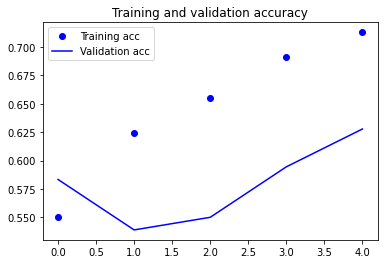

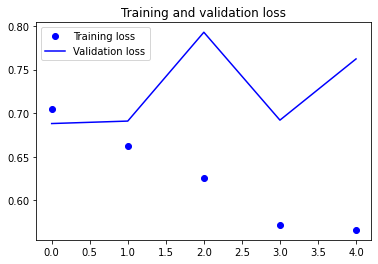

In [ ]:
#import required package
import matplotlib.pyplot as plt

acc = history.history['acc'] # training accuracy
val_acc = history.history['val_acc'] # validation accuracy
loss = history.history['loss'] # training loss
val_loss = history.history['val_loss'] # validation loss

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc') # plot training accuracy
plt.plot(epochs, val_acc, 'b', label='Validation acc') # plot validation accuracy
plt.title('Training and validation accuracy') # create title
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') # plot training loss
plt.plot(epochs, val_loss, 'b', label='Validation loss') # plot validation loss
plt.title('Training and validation loss') # create title
plt.legend()

plt.show()

Found 180 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


                      precision    recall  f1-score   support

         people face       0.66      0.64      0.65        96
people wearing specs       0.60      0.62      0.61        84

            accuracy                           0.63       180
           macro avg       0.63      0.63      0.63       180
        weighted avg       0.63      0.63      0.63       180



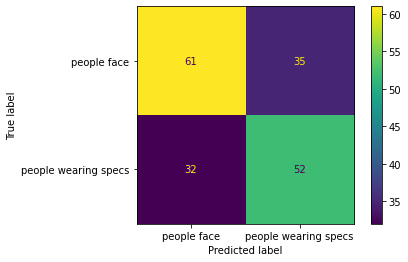

In [ ]:
#Generate Confusion matrix & Classification Report using test data. 
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = test_generator.flow_from_directory(
    validation_dir, # validation dataset
     target_size=(150, 150),
    batch_size=20,
    shuffle=False)

#initial model
predictions = model.predict_generator(test_data_generator, steps=9) # 180/20 = 9
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys()) 

#Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

#Confusion Matrix
cm = confusion_matrix(y_true=true_classes, y_pred=predicted_classes)
labels=class_labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()



*From the plots, we see that model sufferes from overfitting and validation accuracy of 63% and accuracy of 71%, we will try to leverage the use of data augmentation techniques and other methods like dropout layers and earlystopping to increase the robustness of this model and record changes in the accuracy rate. 


## Data Augmentation & Regularized model (model2)
 
From the above plots of the model we can see that our training accuracy increases almost linearly till reaching 100%, however our validation loss has stalled at 80%. Also our validation loss reaches its minimum after 5 epochs and keeps decreasing almost linearly till it reaches 0. 

We notice a case of underfitting here and we will leverage the use of data augmentation techniques, therby generating more training data from existing trainig samples and augmenting the samples via a number of random transformations that yield believable-looking images. This way the model neve sees the exact same picture twice and is exposed to more aspects of the data and helps build a more robust model. 

In [ ]:
#define datagen function
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.4,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

These are just a few of the options available (for more, see the Keras documentation). Let's quickly go over what we just wrote:

* `rotation_range` is a value in degrees (0-180), a range within which to randomly rotate pictures.
* `width_shift` and `height_shift` are ranges (as a fraction of total width or height) within which to randomly translate pictures 
vertically or horizontally.
* `shear_range` is for randomly applying shearing transformations.
* `zoom_range` is for randomly zooming inside pictures.
* `horizontal_flip` is for randomly flipping half of the images horizontally -- relevant when there are no assumptions of horizontal 
asymmetry (e.g. real-world pictures).
* `fill_mode` is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

Example of how an agumented image will be:

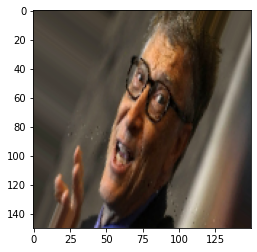

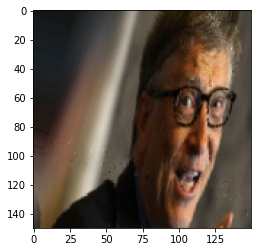

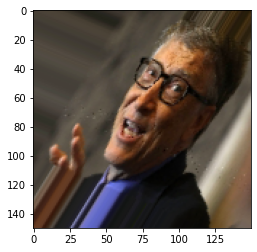

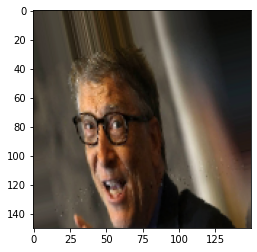

In [ ]:
# Import image preprocessing utilities
from keras.preprocessing import image
from google.colab import files
import matplotlib.pyplot as plt

# We pick one image to "augment"
img_path = train_dir + '/people wearing specs/17.getty_499436010_200014082000928089_358414.jpg'

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

Now that we have completed our data augmentation above, we will re-train the model using dropout layers and adding Early Stopping to stop the model from overfitting and enhance the robustness of the current model architecture.

In [ ]:
#adding droup out after each conv2d and maxpooling layer to increase robustness of model
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras import layers
from keras import models

model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(2, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=10,
                   verbose=2,
                   restore_best_weights=True)

In [ ]:
#check the model
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 17, 17, 128)     

####Proceed to train network using data augmentation, dropout & EarlyStopping

In [ ]:
#import required callback package for earlystopping
from keras import callbacks
import matplotlib.pyplot as plt

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# we simply scale it by the max value (255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')


#fit the model
history = model2.fit_generator(
      train_generator,
      steps_per_epoch=20, # Ideally 574/20 ~ 28
      epochs=100,
      validation_data=validation_generator,
      validation_steps=9, # Ideally 180/20 = 9
      callbacks = [es]) 

Found 574 images belonging to 2 classes.
Found 180 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
 4/20 [=====>........................] - ETA: 20s - loss: 0.4880 - acc: 0.8000

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


20/20 [==============================] - 32s 2s/step - loss: 0.5267 - acc: 0.7437 - val_loss: 0.7870 - val_acc: 0.5833
Epoch 2/100
20/20 [==============================] - 31s 2s/step - loss: 0.4410 - acc: 0.7843 - val_loss: 0.7932 - val_acc: 0.6278
Epoch 3/100
20/20 [==============================] - 32s 2s/step - loss: 0.4610 - acc: 0.7741 - val_loss: 1.1741 - val_acc: 0.5778
Epoch 4/100
20/20 [==============================] - 32s 2s/step - loss: 0.4719 - acc: 0.7675 - val_loss: 0.7887 - val_acc: 0.6389
Epoch 5/100
20/20 [==============================] - 32s 2s/step - loss: 0.5000 - acc: 0.7640 - val_loss: 1.1097 - val_acc: 0.5444
Epoch 6/100
20/20 [==============================] - 32s 2s/step - loss: 0.4509 - acc: 0.7766 - val_loss: 0.8598 - val_acc: 0.6000
Epoch 7/100
20/20 [==============================] - 33s 2s/step - loss: 0.4700 - acc: 0.7792 - val_loss: 0.6145 - val_acc: 0.7000
Epoch 8/100
20/20 [==============================] - 32s 2s/step - loss: 0.4886 - acc: 0.7640 -

In [ ]:
#Let's save our model 
model2.save('/content/drive/Shareddrives/Deep Learning Project/wearingglass.h5')

###Plot the results


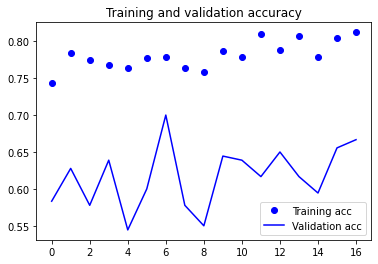

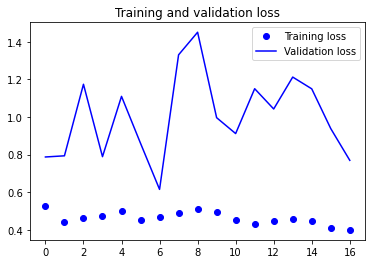

In [ ]:
acc = history.history['acc'] # training accuracy
val_acc = history.history['val_acc'] # validation accuracy
loss = history.history['loss'] # training loss
val_loss = history.history['val_loss'] # validtion loss

epochs = range(len(acc))

#plot training acc as dots and validation acc as a line to realize the resulting trend
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

##plot training loss as dots and validation loss as a line to realize the resulting trend
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

*  The overall robustness of the model has improved.
* Using dropout layers has helped enhance the training accuracy (81%), however hasnt had the same impact on the validation accuracy (66%)


###Confusion Matrix of our Regularized Model

Found 180 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


                      precision    recall  f1-score   support

         people face       0.78      0.66      0.72        92
people wearing specs       0.70      0.81      0.75        88

            accuracy                           0.73       180
           macro avg       0.74      0.73      0.73       180
        weighted avg       0.74      0.73      0.73       180



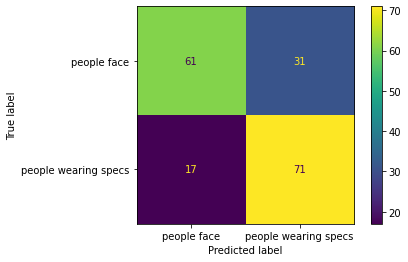

In [ ]:
#Generate Confusion matrix & Classification Report using test data. 
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = test_generator.flow_from_directory(
    test_dir, # test data path here
     target_size=(150, 150),
    batch_size=20,
    shuffle=False)

#model2
predictions = model2.predict_generator(test_data_generator, steps=9) # 180/20 = 9
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys()) 

#Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

#Confusion Matrix
cm = confusion_matrix(y_true=true_classes, y_pred=predicted_classes)
labels=class_labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()


* From the regularization using dropout layers,earlystopping, various hyperparameter tunning (via batchsize, epochs etc) and data augmentation the robustness of the model has significantly improved and can be gauged from the metric plots however the accuracy of the model was unable to be improved much, owing to the very small dataset. 

* We will try to leverage the use of pre-trained models avaialable in the keras packages to achieve this higher accuracy model. 
* We can also see that from the confusion matrix (test accuracy 73%) a large number of images are correctly classified as peopel wearing specs which is our target variable as compared to the intial model.
* However trying to further improve this model via various ways like regularization, adding, droping layers is time and commute intensive and we should try to leverage the predictive power of pre-trained models (transfer learning)

#Building the Model using other Architectures


![vgg19](https://static.javatpoint.com/tutorial/pytorch/images/style-transferring-in-pytorch2.png)

###Build using VGG19 architecture (model3)

#####VGG19 is a variant of VGG model which in short consists of 19 layers (16 convolution layers, 3 Fully connected layer, 5 MaxPool layers and 1 softmax layer)

For our purposes we will not be making use of the fully connected layers and softmax layer from this architecture, rather our dense layer will be trained based on our custom classification problem requirements


In [ ]:
from keras.applications.vgg19 import VGG19

conv_base = VGG19(weights='imagenet', # weights from imagenet - very important! otherwise it's just the network structure
                  include_top=False, # this means that our dense layer will be trained specific to our small data problem that we are solving
                  input_shape=(150, 150, 3)) # this is the shape of the data from our data generator (we know cats vs. dogs is 150 x 150)

In [ ]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

We will start by running instances of the previously-introduced `ImageDataGenerator` to extract images as Numpy arrays as well as 
their labels. We will extract features from these images simply by calling the `predict` method of the `conv_base` model.

In [ ]:
#automated feature engineering
from datetime import datetime
import numpy as np
startTime = datetime.now()

# initialize your generator
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512)) # this is given from the VGG16 architecture!
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 574) 
print(datetime.now() - startTime)
validation_features, validation_labels = extract_features(validation_dir, 180)
print(datetime.now() - startTime)
test_features, test_labels = extract_features(test_dir, 180)
print(datetime.now() - startTime)

Found 574 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0:02:58.874641
Found 180 images belonging to 2 classes.
0:03:51.842095
Found 180 images belonging to 2 classes.
0:04:49.762289


In [ ]:
# these are the X features for modeling
train_features = np.reshape(train_features, (574, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (180, 4 * 4 * 512))
test_features = np.reshape(test_features, (180, 4 * 4 * 512))

In [ ]:
#define the model for the densely-connected classifier
import tensorflow as tf
from keras import models
from keras import layers
from keras import optimizers

model3 = models.Sequential()
model3.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer=tf.keras.optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model3.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


29/29 [==============================] - 2s 38ms/step - loss: 0.6964 - acc: 0.5871 - val_loss: 0.7215 - val_acc: 0.5500
Epoch 2/30
29/29 [==============================] - 1s 30ms/step - loss: 0.5745 - acc: 0.7073 - val_loss: 0.6472 - val_acc: 0.6111
Epoch 3/30
29/29 [==============================] - 1s 30ms/step - loss: 0.5163 - acc: 0.7404 - val_loss: 0.6407 - val_acc: 0.6389
Epoch 4/30
29/29 [==============================] - 1s 29ms/step - loss: 0.4720 - acc: 0.7700 - val_loss: 0.6722 - val_acc: 0.6333
Epoch 5/30
29/29 [==============================] - 1s 30ms/step - loss: 0.4567 - acc: 0.7718 - val_loss: 0.6710 - val_acc: 0.6389
Epoch 6/30
29/29 [==============================] - 1s 30ms/step - loss: 0.4103 - acc: 0.8223 - val_loss: 0.6757 - val_acc: 0.6333
Epoch 7/30
29/29 [==============================] - 1s 30ms/step - loss: 0.3819 - acc: 0.8606 - val_loss: 0.6409 - val_acc: 0.6611
Epoch 8/30
29/29 [==============================] - 1s 30ms/step - loss: 0.3667 - acc: 0.8519 

Fastest compute time and best training accuracy at 96%

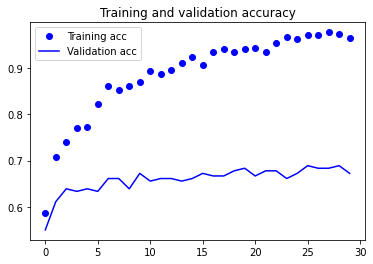

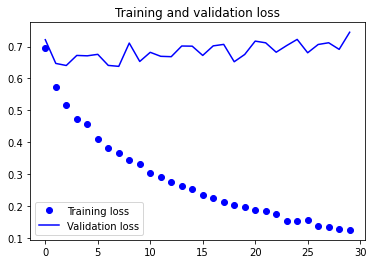

In [ ]:
#Plot the results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##Using Freezing (model4) & VGG19

By Freezing the convolution(image processing) portion of the DCNN we will only be updating the weights from the two `Dense` layers that we added will be trained. That's a total of four weight tensors: two per 
layer (the main weight matrix and the bias vector).

In [ ]:
#import required packages and build model using the freezing of the conv base
from keras import models
from keras import layers

model4 = models.Sequential()
model4.add(conv_base)
model4.add(layers.Flatten())
model4.add(layers.Dense(256, activation='relu'))
model4.add(layers.Dense(2, activation='sigmoid'))

In [ ]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model4.trainable_weights))

This is the number of trainable weights before freezing the conv base: 36


In [ ]:
#freeze the convlution base of the pre-trained model 
conv_base.trainable = False

In [ ]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model4.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [ ]:
#using batch_size = 20
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

#data augmentation of training data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')


model4.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=10,
                   verbose=2,
                   restore_best_weights=True)

Found 574 images belonging to 2 classes.
Found 180 images belonging to 2 classes.


In [ ]:
#fit the model
history = model4.fit( #model.fit_generator(
      train_generator,
      steps_per_epoch=20, # Ideally...574/20 ~28
      epochs=100, 
      validation_data=validation_generator,
      validation_steps=9, # 180/20 == 9
      verbose=2,
      callbacks = [es])

Epoch 1/100
20/20 - 172s - loss: 0.6485 - acc: 0.6500 - val_loss: 0.6521 - val_acc: 0.6111 - 172s/epoch - 9s/step
Epoch 2/100
20/20 - 168s - loss: 0.6154 - acc: 0.6929 - val_loss: 0.6398 - val_acc: 0.5944 - 168s/epoch - 8s/step
Epoch 3/100


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


20/20 - 170s - loss: 0.5896 - acc: 0.7200 - val_loss: 0.6330 - val_acc: 0.6111 - 170s/epoch - 8s/step
Epoch 4/100
20/20 - 168s - loss: 0.5773 - acc: 0.7386 - val_loss: 0.6247 - val_acc: 0.6278 - 168s/epoch - 8s/step
Epoch 5/100
20/20 - 168s - loss: 0.5437 - acc: 0.7690 - val_loss: 0.6189 - val_acc: 0.6333 - 168s/epoch - 8s/step
Epoch 6/100
20/20 - 169s - loss: 0.5386 - acc: 0.7741 - val_loss: 0.6296 - val_acc: 0.6667 - 169s/epoch - 8s/step
Epoch 7/100
20/20 - 169s - loss: 0.5374 - acc: 0.7690 - val_loss: 0.6201 - val_acc: 0.6500 - 169s/epoch - 8s/step
Epoch 8/100
20/20 - 169s - loss: 0.4943 - acc: 0.8096 - val_loss: 0.6179 - val_acc: 0.6444 - 169s/epoch - 8s/step
Epoch 9/100
20/20 - 170s - loss: 0.4682 - acc: 0.7944 - val_loss: 0.6385 - val_acc: 0.6611 - 170s/epoch - 8s/step
Epoch 10/100
20/20 - 171s - loss: 0.4704 - acc: 0.8071 - val_loss: 0.6533 - val_acc: 0.6500 - 171s/epoch - 9s/step
Epoch 11/100
20/20 - 172s - loss: 0.4754 - acc: 0.7775 - val_loss: 0.6466 - val_acc: 0.6556 - 172s/

* Following the model we see 85.28% for training accuracy and validation accuracy of 68% which is better than all the models we have tested thus far with the exception feature extracted model using vgg19

###Plot Results

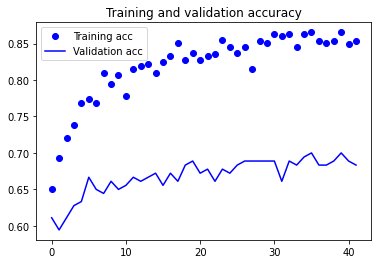

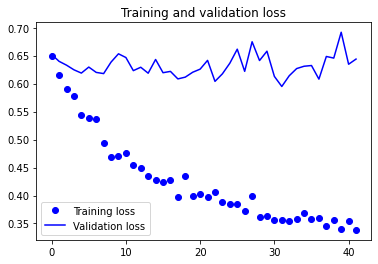

In [ ]:
#Plot Results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Found 180 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


                      precision    recall  f1-score   support

         people face       0.82      0.67      0.74        92
people wearing specs       0.71      0.84      0.77        88

            accuracy                           0.76       180
           macro avg       0.76      0.76      0.75       180
        weighted avg       0.76      0.76      0.75       180



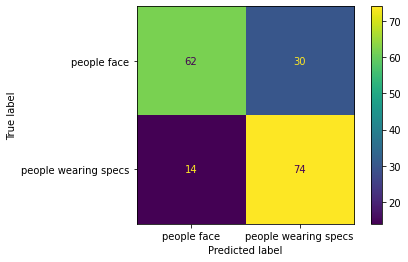

In [ ]:
#Generate Confusion matrix & Classification Report using test data. 
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = test_generator.flow_from_directory(
    test_dir, # test data path here
     target_size=(150, 150),
    batch_size=20,
    shuffle=False)

#model4
predictions = model4.predict_generator(test_data_generator, steps=9) # 180/20 = 9
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys()) 

#Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

#Confusion Matrix
cm = confusion_matrix(y_true=true_classes, y_pred=predicted_classes)
labels=class_labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

* Accuracy on the test dataset is 76%, which is the best accuracy among all the models we have tested.

#Business Case - using model4 (Test dataset)

* Of the 88 customers who wear glasses and are planning to watch the movie in 3D, 74 customers are rightly classified as those that will require 3D clip on glasses to watch the movie with their existing glasses. 

* However our model also wrongly misses our 14 people as not requiring the glasses, our model also unfortunately wrongly classifies 30 customer out of 92 who dont wear glasses as requiring the 3D clip-on glasses. 

* To further improve the accuracy of model4 and decrease the false positives we can try to perform extensive regularization by adding feedforward layers, dropout, tweak hyperparameters like batch size, steps per epochs, epochs etc and tweak the training data augmentation, re-run them using GPU cluster to decrease compute time.

#Conclusion & Observations

* Post data gathering and image processing we can see that the total number of images for train set reduces from 600 images to 571 images in the image processing step in keras and similarly from 200 images to 180 images for the validation dataset.This could the acceptable file formats for the CNN are jpeg/png, images of other formats are dropped.

* After appling VGG19 model, the validation accuracy increased. It is much better than our previous model.

* From testing different model architectures we have realized that when dealing with very few datasets/samples of image data its best to make use of transfer learning and re-use the architecture available in the pre-trained models to be able to get our best fit model based on the problem we are trying to solve. It saves us time in designing the solution and is less compute intensive as well.

* Trying to build out a cnn architecture especially when dealing with very low datasets is time and compute intensive and requires a very large learning rate to be able to arrive at the best fit model. 

* When comparing the model architectures we got the best training accuracy using the feature extraction of the pre-trained model vgg19, we also got a better model using the freezing of the convolutional layers method on the vgg19 architecture along with data augmentation, dropout and earlystopping. Although it too was time and compute intensive owing to running on normal cpu cluster we were still able to generate a much better fitting model (model4) as compared to our intial model.

* Using Hyperparameter tunning and performing regularization via data augmentation, dropout and earlystopping significantly improved the initial models performance and robustness. The same phenomenon was observed when using pre-trained models as well. 

#Referrences:


* Vu, T. (2022). Films play an important role in our everyday lives. Retrieved 20 March 2022, from https://www.academia.edu/7037882/Films_play_an_important_role_in_our_everyday_lives

* Neal, M. (2016). Why Are 3D Movies Still a Thing?. Retrieved 20 March 2022, from https://www.vice.com/en/article/8q8xy3/why-are-3d-movies-still-a-thing

* Schedeen, J. (2016). The History of 3D Movie Tech - IGN. Retrieved 20 March 2022, from https://www.ign.com/articles/2010/04/23/the-history-of-3d-movie-tech

* Sinha, P. (2017). How do people with glasses watch 3D movies?. Retrieved 20 March 2022, from https://www.quora.com/How-do-people-with-glasses-watch-3D-movies

* How can I watch a 3D movie if I already wear glasses. (2016). Retrieved 20 March 2022, from https://lifehacks.stackexchange.com/questions/11574/how-can-i-watch-a-3d-movie-if-i-already-wear-glasses

* Villán, A. (2015). Glasses detection on real images based on robust alignment. Retrieved 20 March 2022, from https://www.researchgate.net/publication/274249930_Glasses_detection_on_real_images_based_on_robust_alignment

* Urthaler, P. (2008). Glasses detection and segmentation from face portrait images. Retrieved 20 March 2022, from https://www.tugraz.at/fileadmin/user_upload/Institute/ICG/Images/team_bischof/mib/paper_pdfs/StudentsMasterTheses/DA_urthaler.pdf

* Du, S., Liu, J., Liu, Y., Zhang, X., & Xue, J. (2015). Precise glasses detection algorithm for face with in-plane rotation. Multimedia Systems, 23(3), 293-302. doi: 10.1007/s00530-015-0483-4

* Bekhet, S., & Alahmer, H. (2020). A robust deep learning approach for glasses detection in non‐standard facial images. IET Biometrics, 10(1), 74-86. doi: 10.1049/bme2.12004

* Shao, L., Zhu, R., & Zhao, Q. (2016). Glasses Detection Using Convolutional Neural Networks. Retrieved 20 March 2022, from https://www.researchgate.net/publication/308393592_Glasses_Detection_Using_Convolutional_Neural_Networks